In [1]:
import numpy as np
import xarray as xr
import salishsea_tools.river_202108 as rivers
import matplotlib.pyplot as plt

In [2]:
region = 'Squamish'
dep_idx = 39

In [3]:
fw_rivers = xr.open_dataset('/ocean/cdonaldson/research_runs/dye_tracers/extractions/SalishSeaCast_river_trace_day_avg_river_tracers_'+ region +'_region_20230301_20230731.nc')

In [4]:
mesh = xr.open_dataset('/home/sallen/MEOPAR/grid/mesh_mask202108.nc')
# the mask is 1 where there is water, we want the opposite.  The meshmask has an extra dimension, hence the [0]
tmask = 1 - mesh.tmask[0]

In [5]:
def river_box(w_shed, r_call, box_side):
    river_idx = [rivers.prop_dict[w_shed][r_call]['i'], rivers.prop_dict[w_shed][r_call]['j']]
    river_range = [river_idx[0] - box_side, river_idx[0] + box_side, river_idx[1] - box_side, river_idx[1] + box_side]

    if (river_range[0] < 0):
        river_range[0] = 0
        river_range[1] = box_side*2

    if (898 - river_range[1] < 0):
        river_range[0] = 898-box_side*2
        river_range[1] = 898

    if (398 - river_range[3] < 0):
        river_range[2] = 398-box_side*2
        river_range[3] = 398

    return river_range

In [6]:
box_size = 40
# order (CW starting under the Fraser): Nooksack, Skagit, Snohomish, Nisqually, Elwha, Cowichan, Nanaimo, Puntledge, Salmon, Homathko, Squamish
Nooksack = river_box('fraser', 'Nooksack', box_size)
Skagit = river_box('skagit', 'Skagit1', box_size)
Snohomish = river_box('skagit', 'SnohomishAllenQuilceda', box_size)
Nisqually = river_box('puget', 'NisquallyMcAllister', box_size)
Elwha = river_box('jdf', 'Elwha', box_size)
Cowichan = river_box('evi_s', 'Cowichan1', box_size)
Nanaimo = river_box('evi_s', 'Nanaimo1', box_size)
Puntledge = river_box('evi_s', 'Puntledge', box_size)
Salmon = river_box('evi_n', 'SalmonSayward', box_size)
Homathko = river_box('bute', 'Homathko', box_size)
Squamish = river_box('howe', 'Squamish', box_size)

In [7]:
Salmon

[818, 898, 24, 104]

In [8]:
def make_ts_arr(jdepth, data):
#    river_arr = data[:, 0:jdepth].sum(axis=2).sum(axis=1)  # this gives time series at each grid point! pretty cool but not what I need. maybe I can do something with depth too but rn I want to do depth int
    river_arr = data[:, 0:jdepth].sum(axis=3).sum(axis=2).sum(axis=1)
    return river_arr.to_numpy()

In [9]:
# time = fw_rivers['time_counter'].to_numpy()
time = fw_rivers['time'].to_numpy()

In [10]:

Nooksack_arr = make_ts_arr(dep_idx, fw_rivers.nooksack_river)
Skagit_arr = make_ts_arr(dep_idx, fw_rivers.skagit_river)
Snohomish_arr = make_ts_arr(dep_idx, fw_rivers.snohomish_river)
Nisqually_arr = make_ts_arr(dep_idx, fw_rivers.nisqually_river)
Elwha_arr = make_ts_arr(dep_idx, fw_rivers.elwha_river)
Cowichan_arr = make_ts_arr(dep_idx, fw_rivers.cowichan_river)
Nanaimo_arr = make_ts_arr(dep_idx, fw_rivers.nanaimo_river)
Puntledge_arr = make_ts_arr(dep_idx, fw_rivers.puntledge_river)
Salmon_arr = make_ts_arr(dep_idx, fw_rivers.salmon_river)
Homathko_arr = make_ts_arr(dep_idx, fw_rivers.homathko_river)
Squamish_arr = make_ts_arr(dep_idx, fw_rivers.squamish_river)

Fraser_arr = make_ts_arr(dep_idx, fw_rivers.fraser_river)
Other_arr = make_ts_arr(dep_idx, fw_rivers.other_rivers)

In [11]:
Total_arr = Nooksack_arr + Skagit_arr + Snohomish_arr + Nisqually_arr + Elwha_arr + Cowichan_arr + Nanaimo_arr + Puntledge_arr + Salmon_arr + Homathko_arr + Squamish_arr + Fraser_arr + Other_arr

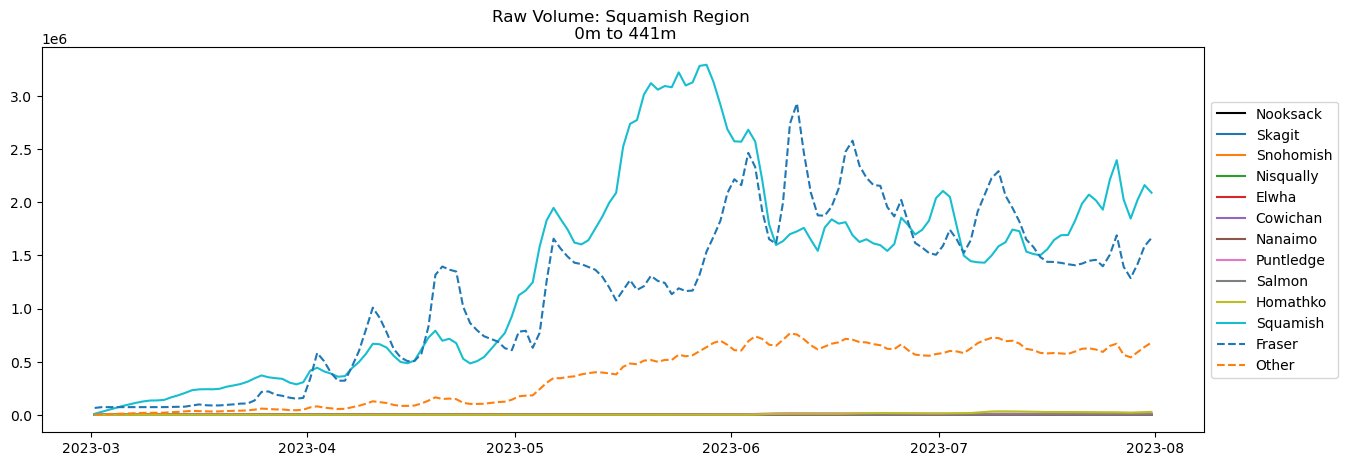

In [12]:
fig, ax = plt.subplots(1, 1, figsize=(15, 5))
ax.plot(time, Nooksack_arr, label='Nooksack', color='k')
ax.plot(time, Skagit_arr, label='Skagit')
ax.plot(time, Snohomish_arr, label='Snohomish')
ax.plot(time, Nisqually_arr, label='Nisqually')
ax.plot(time, Elwha_arr, label='Elwha')
ax.plot(time, Cowichan_arr, label='Cowichan')
ax.plot(time, Nanaimo_arr, label='Nanaimo')
ax.plot(time, Puntledge_arr, label='Puntledge')
ax.plot(time, Salmon_arr, label='Salmon')
ax.plot(time, Homathko_arr, label='Homathko')
ax.plot(time, Squamish_arr, label='Squamish')
ax.plot(time, Fraser_arr, label='Fraser', linestyle='--')
ax.plot(time, Other_arr, label='Other', linestyle='--')

ax.set_title('Raw Volume: {} Region \n 0m to {}m'.format(region, int(float(fw_rivers['depth'][dep_idx].values))))

ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.savefig('timeseries_plots/'+region+'_volume_0_{}m.png'.format(int(float(fw_rivers['depth'][dep_idx].values))))

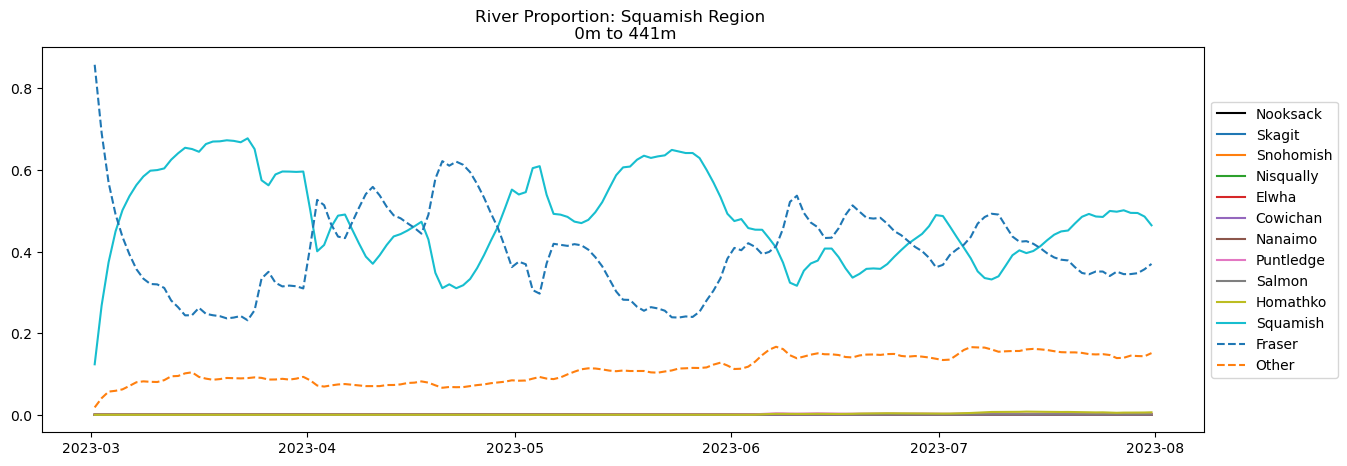

In [13]:
fig, ax = plt.subplots(1, 1, figsize=(15, 5))
ax.plot(time, Nooksack_arr/Total_arr, label='Nooksack', color='k')
ax.plot(time, Skagit_arr/Total_arr, label='Skagit')
ax.plot(time, Snohomish_arr/Total_arr, label='Snohomish')
ax.plot(time, Nisqually_arr/Total_arr, label='Nisqually')
ax.plot(time, Elwha_arr/Total_arr, label='Elwha')
ax.plot(time, Cowichan_arr/Total_arr, label='Cowichan')
ax.plot(time, Nanaimo_arr/Total_arr, label='Nanaimo')
ax.plot(time, Puntledge_arr/Total_arr, label='Puntledge')
ax.plot(time, Salmon_arr/Total_arr, label='Salmon')
ax.plot(time, Homathko_arr/Total_arr, label='Homathko')
ax.plot(time, Squamish_arr/Total_arr, label='Squamish')
ax.plot(time, Fraser_arr/Total_arr, label='Fraser', linestyle='--')
ax.plot(time, Other_arr/Total_arr, label='Other', linestyle='--')

ax.set_title('River Proportion: {} Region \n 0m to {}m'.format(region, int(float(fw_rivers['depth'][dep_idx].values))))

ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.savefig('timeseries_plots/'+region+'_proportion_0_{}m.png'.format(int(float(fw_rivers['depth'][dep_idx].values))))

In [15]:
# filename = 'SalishSeaCast_river_trace_day_avg_river_tracers_'+ region +'_region_20230301_20230731.nc'
# fw_test = xr.open_dataset('/ocean/cdonaldson/research_runs/long_dye_tracers/extractions/' + filename)

In [22]:
import matplotlib as mpl
import matplotlib.colors as colors

In [19]:
fudge = 0.00005

In [38]:
fw_test1 = xr.open_dataset('/ocean/cdonaldson/research_runs/dye_tracers/monthly_phys_trc/26mar23/SalishSea_1h_20230326_20230326_rivr_T.nc')

In [33]:
day = '26'
fw_test2 = xr.open_dataset('/ocean/cdonaldson/research_runs/long_dye_tracers/monthly_results/{}jan17/SalishSea_1h_201701{}_201701{}_rivr_T.nc'.format(day, day, day))

Text(0.5, 1.0, 'River Subset, Timestep = 0')

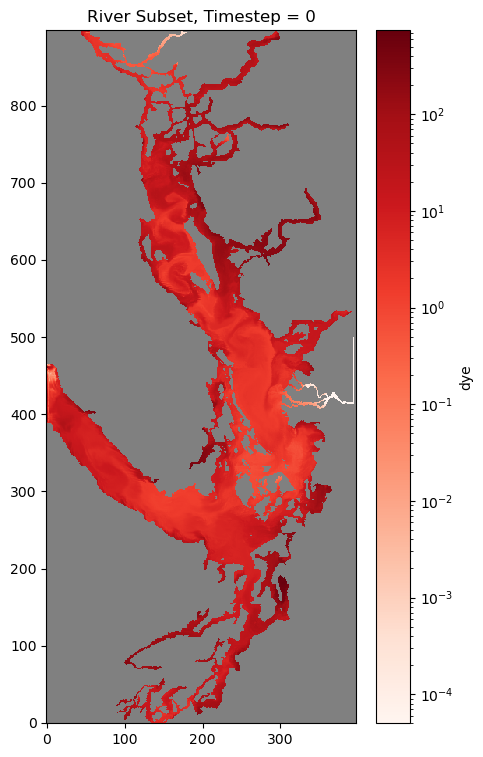

In [37]:
tstep = 0

# subset_rivers = fw_test2.nooksack_river[tstep, 0] + fw_test2.skagit_river[tstep, 0] + fw_test2.snohomish_river[tstep, 0] + fw_test2.nisqually_river[tstep, 0] + fw_test2.elwha_river[tstep, 0] + \
#     fw_test2.cowichan_river[tstep, 0] + fw_test2.nanaimo_river[tstep, 0] + fw_test2.puntledge_river[tstep, 0] + fw_test2.salmon_river[tstep, 0] + fw_test2.homathko_river[tstep, 0] + \
#     fw_test2.squamish_river[tstep, 0]

subset_rivers = fw_test2.other_rivers[tstep, 0]

freshwater = np.ma.masked_array(subset_rivers, mask=tmask[0])

X = np.arange(0,398)
Y = np.arange(0,898)
Z = freshwater + fudge

cmap = mpl.colormaps['Reds']
cmap.set_bad('grey')
fig, ax = plt.subplots(1, 1, figsize=(5, 9))
colours = ax.pcolormesh(X, Y, Z, norm=colors.LogNorm(vmin=fudge), cmap=cmap)
cb = fig.colorbar(colours, ax=ax)
cb.set_label('dye')
ax.set_title('River Subset, Timestep = {}'.format(str(tstep)))

In [44]:
fw_test1.time_centered

<xarray.DataArray 'time_centered' (time_counter: 24)>
[24 values with dtype=datetime64[ns]]
Coordinates:
    time_centered  (time_counter) datetime64[ns] ...
  * time_counter   (time_counter) datetime64[ns] 2023-03-26T00:30:00 ... 2023...
Attributes:
    standard_name:  time
    long_name:      Time axis
    time_origin:    1900-01-01 00:00:00
    bounds:         time_centered_bounds

In [45]:
fw_test2.time_centered

<xarray.DataArray 'time_centered' (time_counter: 24)>
[24 values with dtype=datetime64[ns]]
Coordinates:
    time_centered  (time_counter) datetime64[ns] ...
  * time_counter   (time_counter) datetime64[ns] 2017-01-26T00:30:00 ... 2017...
Attributes:
    standard_name:  time
    long_name:      Time axis
    time_origin:    1900-01-01 00:00:00
    bounds:         time_centered_bounds